# INTEGRANTES


*   Luis Ernesto Rodriguez Felacio
*   Andrés David Ariza Granados



In [1]:
# IMPORT librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import geopandas as gpd

In [2]:
#Obtener Datos

df = pd.read_csv("./Recuperaci_n_Veh_culos_Polic_a_Nacional.csv")

In [3]:
# Previsualizar datos
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,CLASE BIEN,FECHA HECHO,CANTIDAD
0,ATLÁNTICO,MALAMBO,8433000,MOTOCICLETA,1/01/2010,1
1,BOYACÁ,TUNJA (CT),15001000,MOTOCICLETA,1/01/2010,1
2,CALDAS,MANIZALES (CT),17001000,MOTOCICLETA,1/01/2010,1
3,CESAR,VALLEDUPAR (CT),20001000,MOTOCICLETA,1/01/2010,2
4,CÓRDOBA,LORICA,23417000,MOTOCICLETA,1/01/2010,1


In [4]:
# Dimensiones del dataframe

df.shape

(162709, 6)

In [5]:
# Columnas del dataframe

df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'CLASE BIEN', 'FECHA HECHO',
       'CANTIDAD'],
      dtype='object')

In [6]:
# Tipos de datos de las columnas del dataframe

df.dtypes

DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE      int64
CLASE BIEN      object
FECHA HECHO     object
CANTIDAD         int64
dtype: object

In [7]:
# Cantidad de registros del dataset

print("Dataset length", len(df))

Dataset length 162709


In [8]:
#renombrar columnas del dataset

name = ['DEPARTAMENTO','MUNICIPIO', 'CIUDAD_DANE', 'TIPO_VEHICULO','FECHA_RECUPERACION','CANTIDAD']
df.columns = name
df.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CIUDAD_DANE', 'TIPO_VEHICULO',
       'FECHA_RECUPERACION', 'CANTIDAD'],
      dtype='object')

In [9]:
# Mostrar los valores únicos en cada columna
for columna in df.columns:
    valores_unicos = df[columna].value_counts()
    print(f"Valores en la columna {columna}:\n{valores_unicos}\n")

Valores en la columna DEPARTAMENTO:
DEPARTAMENTO
ANTIOQUIA             24201
CUNDINAMARCA          18432
VALLE                 16766
CAUCA                 13331
NARIÑO                10035
ATLÁNTICO              8264
NORTE DE SANTANDER     6371
HUILA                  5640
SANTANDER              5559
META                   5415
CESAR                  5031
TOLIMA                 4374
GUAJIRA                4326
CÓRDOBA                4242
BOLÍVAR                4190
MAGDALENA              3996
RISARALDA              3692
BOYACÁ                 2354
SUCRE                  2300
PUTUMAYO               2017
CASANARE               1945
CALDAS                 1873
CAQUETÁ                1758
CHOCÓ                  1712
QUINDÍO                1673
ARAUCA                 1357
AMAZONAS                723
GUAVIARE                445
SAN ANDRÉS              320
VICHADA                 277
GUAINÍA                  59
VAUPÉS                   31
Name: count, dtype: int64

Valores en la columna MUNICI

In [10]:
# Tipos de datos del Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162709 entries, 0 to 162708
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   DEPARTAMENTO        162709 non-null  object
 1   MUNICIPIO           162709 non-null  object
 2   CIUDAD_DANE         162709 non-null  int64 
 3   TIPO_VEHICULO       162709 non-null  object
 4   FECHA_RECUPERACION  162709 non-null  object
 5   CANTIDAD            162709 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 7.4+ MB


In [11]:
# Comprobamos que no todos los codigos de la variable CIUDAD_DANE cuando es Bogotá tienen la misma etiqueta, algunos estan en minuscula

df[(df.MUNICIPIO != "BOGOTÁ D.C. (CT)") & (df.CIUDAD_DANE == 11001000)]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
152589,CUNDINAMARCA,Bogotá D.C. (CT),11001000,CUATRIMOTO,12/01/2023,1
152590,CUNDINAMARCA,Bogotá D.C. (CT),11001000,CUATRIMOTO,06/02/2023,1
152610,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTO-CARRO,06/02/2023,1
156168,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTOCICLETA,01/01/2023,12
156169,CUNDINAMARCA,Bogotá D.C. (CT),11001000,MOTOCICLETA,02/01/2023,5
...,...,...,...,...,...,...
162633,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,7/05/2023,1
162634,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,9/05/2023,1
162635,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,27/05/2023,1
162636,CUNDINAMARCA,Bogotá D.C. (CT),11001000,VEHICULO-PANEL,11/06/2023,1


In [12]:
#Realizamos el metodo para que todos los municipios queden en mayuscula

df['MUNICIPIO'] = df['MUNICIPIO'].str.upper()

In [13]:
# Comrprobamos el cambio realizado

df[df.CIUDAD_DANE == 11001000]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
18,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CAMIONETA,1/01/2010,1
25,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,MOTOCICLETA,2/01/2010,1
72,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,MOTOCICLETA,4/01/2010,3
114,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,AUTOMOVIL,5/01/2010,4
122,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,CAMIONETA,5/01/2010,2
...,...,...,...,...,...,...
162633,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,7/05/2023,1
162634,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,9/05/2023,1
162635,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,27/05/2023,1
162636,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,VEHICULO-PANEL,11/06/2023,1


In [14]:
# Encontramos que algunos datos de CIUDAD_DANE para Medellin no vienen con el mismo codigo.

df[(df.MUNICIPIO == "MEDELLÍN (CT)") & (df.CIUDAD_DANE != 5001000)]

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
153301,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,24/02/2023,1
153310,ANTIOQUIA,MEDELLÍN (CT),5001001,MOTOCICLETA,04/03/2023,1
153371,ANTIOQUIA,MEDELLÍN (CT),5001001,MOTOCICLETA,04/05/2023,1
153373,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,05/05/2023,1
153376,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,07/05/2023,1
153411,ANTIOQUIA,MEDELLÍN (CT),5001004,MOTOCICLETA,10/06/2023,1
161604,ANTIOQUIA,MEDELLÍN (CT),5001004,CAMION,7/07/2023,1
161794,ANTIOQUIA,MEDELLÍN (CT),5001004,CAMIONETA,21/04/2023,1
162686,ANTIOQUIA,MEDELLÍN (CT),5001008,VOLQUETA,14/02/2023,1


In [15]:
# Con esta funcion aplicamos una consulta para saber cuantos registros no tienen "000" en sus ultimos 3 digitos en la variable CIUDAD_DANE

def tiene_tres_ceros_al_reves(numero):
    if len(str(numero)) == 7:
        flag = str(numero)[:3:-1] != '000'
    else:
        flag = str(numero)[:4:-1] != '000'
    return flag

# Filtrar filas donde 'CIUDAD_DANE' invertida no sea igual a '000'
df_filtrado = df[df['CIUDAD_DANE'].apply(tiene_tres_ceros_al_reves)]
df_filtrado

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
152628,AMAZONAS,LETICIA (CT),91001008,MOTOCICLETA,05/02/2023,1
152680,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,24/05/2023,1
152683,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,20/06/2023,1
152686,ANTIOQUIA,AMAGÁ,5030011,MOTOCICLETA,20/07/2023,1
152810,ANTIOQUIA,BELLO,5088003,MOTOCICLETA,26/06/2023,1
...,...,...,...,...,...,...
162549,CAUCA,ROSAS,19622012,TRACTO_CAMION,29/07/2023,1
162584,TOLIMA,ESPINAL,73268001,TRACTOR,24/02/2023,1
162603,ANTIOQUIA,REMEDIOS,5604001,VEHICULO-PANEL,7/06/2023,1
162664,MAGDALENA,PUEBLOVIEJO,47570004,VEHICULO-PANEL,28/07/2023,1


In [16]:
# Transofrmamos los valores de CIUDAD_DANE quitando los ultimos 3 digitos y con esto se soluciona el problema de que los municipios no correspondian a sus respectivos codigos de CIUDAD_DANE

df['CIUDAD_DANE'] = df['CIUDAD_DANE'].astype(str).str.slice(stop=-3).astype(int)

In [17]:
# Comprobamos el ajuste anterior

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
0,ATLÁNTICO,MALAMBO,8433,MOTOCICLETA,1/01/2010,1
1,BOYACÁ,TUNJA (CT),15001,MOTOCICLETA,1/01/2010,1
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,1/01/2010,1
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,1/01/2010,2
4,CÓRDOBA,LORICA,23417,MOTOCICLETA,1/01/2010,1
5,CÓRDOBA,LOS CÓRDOBAS,23419,MOTOCICLETA,1/01/2010,1
6,CÓRDOBA,MONTERÍA (CT),23001,MOTOCICLETA,1/01/2010,2
7,CÓRDOBA,SAHAGÚN,23660,MOTOCICLETA,1/01/2010,1
8,NARIÑO,IPIALES,52356,MOTOCICLETA,1/01/2010,1
9,NORTE DE SANTANDER,OCAÑA,54498,MOTOCICLETA,1/01/2010,1


In [18]:
# Transformamos la fecha de recuperación del vehiculo de formato String a Datetime

df['FECHA_RECUPERACION'] = pd.to_datetime(df['FECHA_RECUPERACION'], format="%d/%m/%Y")

In [19]:
# Comprobamos el ajuste anterior

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
0,ATLÁNTICO,MALAMBO,8433,MOTOCICLETA,2010-01-01,1
1,BOYACÁ,TUNJA (CT),15001,MOTOCICLETA,2010-01-01,1
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,2010-01-01,1
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,2010-01-01,2
4,CÓRDOBA,LORICA,23417,MOTOCICLETA,2010-01-01,1
5,CÓRDOBA,LOS CÓRDOBAS,23419,MOTOCICLETA,2010-01-01,1
6,CÓRDOBA,MONTERÍA (CT),23001,MOTOCICLETA,2010-01-01,2
7,CÓRDOBA,SAHAGÚN,23660,MOTOCICLETA,2010-01-01,1
8,NARIÑO,IPIALES,52356,MOTOCICLETA,2010-01-01,1
9,NORTE DE SANTANDER,OCAÑA,54498,MOTOCICLETA,2010-01-01,1


In [20]:
# Comprobamos el ajuste del nuevo tipo de dato para la FECHA_RECUPERACION

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162709 entries, 0 to 162708
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DEPARTAMENTO        162709 non-null  object        
 1   MUNICIPIO           162709 non-null  object        
 2   CIUDAD_DANE         162709 non-null  int64         
 3   TIPO_VEHICULO       162709 non-null  object        
 4   FECHA_RECUPERACION  162709 non-null  datetime64[ns]
 5   CANTIDAD            162709 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 7.4+ MB


In [21]:
# Eliminamos las tildes que pueden causar errores de compatibilidad al graficarse o filtrarse la información

df['DEPARTAMENTO'] = df['DEPARTAMENTO'].apply(lambda x: unidecode(x))
df['MUNICIPIO'] = df['MUNICIPIO'].apply(lambda x: unidecode(x))

In [22]:
# Comprobación del ajuste anterior.

df.head(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD
0,ATLANTICO,MALAMBO,8433,MOTOCICLETA,2010-01-01,1
1,BOYACA,TUNJA (CT),15001,MOTOCICLETA,2010-01-01,1
2,CALDAS,MANIZALES (CT),17001,MOTOCICLETA,2010-01-01,1
3,CESAR,VALLEDUPAR (CT),20001,MOTOCICLETA,2010-01-01,2
4,CORDOBA,LORICA,23417,MOTOCICLETA,2010-01-01,1
5,CORDOBA,LOS CORDOBAS,23419,MOTOCICLETA,2010-01-01,1
6,CORDOBA,MONTERIA (CT),23001,MOTOCICLETA,2010-01-01,2
7,CORDOBA,SAHAGUN,23660,MOTOCICLETA,2010-01-01,1
8,NARINO,IPIALES,52356,MOTOCICLETA,2010-01-01,1
9,NORTE DE SANTANDER,OCANA,54498,MOTOCICLETA,2010-01-01,1


In [23]:
# Calcular la frecuencia de cada departamento
frecuencia_departamentos = df['DEPARTAMENTO'].value_counts()

# Agrupar departamentos menos frecuentes bajo la categoría 'Otros'
df['DepartamentoAgrupado'] = df['DEPARTAMENTO'].map(lambda x: x if frecuencia_departamentos[x] >= len(df) * 0.025 else 'Otros')

In [24]:
table_departamentos = df.DepartamentoAgrupado.value_counts(normalize=True) * 100
table_departamentos

DepartamentoAgrupado
Otros                 16.306412
ANTIOQUIA             14.873793
CUNDINAMARCA          11.328199
VALLE                 10.304286
CAUCA                  8.193155
NARINO                 6.167452
ATLANTICO              5.079006
NORTE DE SANTANDER     3.915579
HUILA                  3.466311
SANTANDER              3.416529
META                   3.328027
CESAR                  3.092023
TOLIMA                 2.688235
GUAJIRA                2.658734
CORDOBA                2.607108
BOLIVAR                2.575150
Name: proportion, dtype: float64

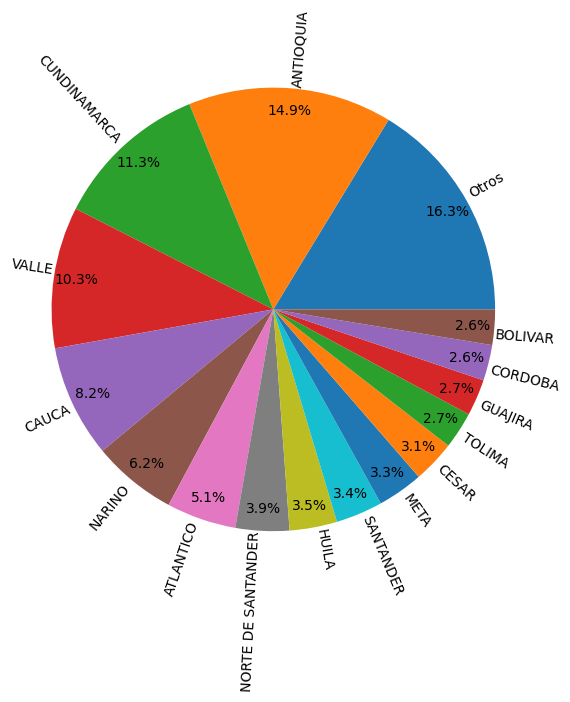

In [25]:
# Gráfico de sectores

plt.pie(table_departamentos,labels = table_departamentos.index,autopct = '%1.1f%%', labeldistance=1, pctdistance=0.9, rotatelabels=True, radius=1.5)
plt.show()

In [26]:
# Calcular la frecuencia de cada tipo de vehiculo
frecuencia_vehiculo = df['TIPO_VEHICULO'].value_counts()

# Agrupar vehiculos menos frecuentes bajo la categoría 'Otros'
df['VEHICULO_AGRUPADO'] = df['TIPO_VEHICULO'].map(lambda x: x if frecuencia_vehiculo[x] >= len(df) * 0.003 else 'Otros')

In [27]:
table_tipo_vehiculo = df.VEHICULO_AGRUPADO.value_counts(normalize=True, ) * 100
table_tipo_vehiculo

VEHICULO_AGRUPADO
MOTOCICLETA       67.422822
AUTOMOVIL         14.712155
CAMIONETA          8.010006
CAMION             3.597834
CAMPERO            1.664936
Otros              1.408035
TAXI               1.015310
TRACTO_CAMION      0.878870
VEHICULO-PANEL     0.805118
VOLQUETA           0.484915
Name: proportion, dtype: float64

In [28]:
df_tipo_vehiculo = pd.DataFrame({'Vehiculo': table_tipo_vehiculo.index,
                                 'Valores':table_tipo_vehiculo.values})

/tmp/ipykernel_8852/2825634311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo,x='Vehiculo',y = 'Valores', palette= 'Set2')


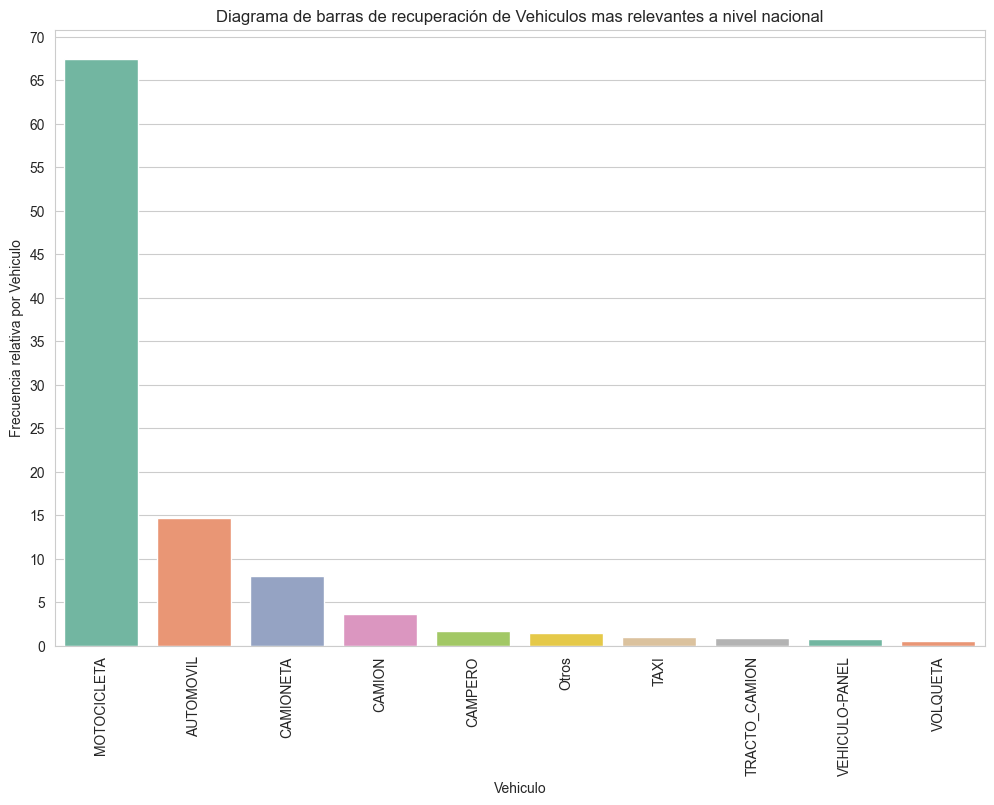

In [29]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes a nivel nacional')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

In [30]:
filtro_antioquia = df[df.DEPARTAMENTO == "ANTIOQUIA"]
filtro_cundinamarca = df[df.DEPARTAMENTO == "CUNDINAMARCA"]
filtro_valle = df[df.DEPARTAMENTO == "VALLE"]
filtro_cauca = df[df.DEPARTAMENTO == "CAUCA"]
filtro_narino = df[df.DEPARTAMENTO == "NARINO"]

table_tipo_vehiculo_antioquia = filtro_antioquia.VEHICULO_AGRUPADO.value_counts(normalize=True) * 100
table_tipo_vehiculo_cundinamarca = filtro_cundinamarca.VEHICULO_AGRUPADO.value_counts(normalize=True) * 100
table_tipo_vehiculo_valle = filtro_valle.VEHICULO_AGRUPADO.value_counts(normalize=True) * 100
table_tipo_vehiculo_cauca = filtro_cauca.VEHICULO_AGRUPADO.value_counts(normalize=True) * 100
table_tipo_vehiculo_narino = filtro_narino.VEHICULO_AGRUPADO.value_counts(normalize=True) * 100

df_tipo_vehiculo_antioquia = pd.DataFrame({'Vehiculo': table_tipo_vehiculo_antioquia.index,'Valores':table_tipo_vehiculo_antioquia.values})
df_tipo_vehiculo_cundinamarca = pd.DataFrame({'Vehiculo': table_tipo_vehiculo_cundinamarca.index,'Valores':table_tipo_vehiculo_cundinamarca.values})
df_tipo_vehiculo_valle = pd.DataFrame({'Vehiculo': table_tipo_vehiculo_valle.index,'Valores':table_tipo_vehiculo_valle.values})
df_tipo_vehiculo_cauca = pd.DataFrame({'Vehiculo': table_tipo_vehiculo_cauca.index,'Valores':table_tipo_vehiculo_cauca.values})
df_tipo_vehiculo_narino = pd.DataFrame({'Vehiculo': table_tipo_vehiculo_narino.index,'Valores':table_tipo_vehiculo_narino.values})

/tmp/ipykernel_8852/3241504716.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo_antioquia,x='Vehiculo',y = 'Valores', palette= 'Set2')


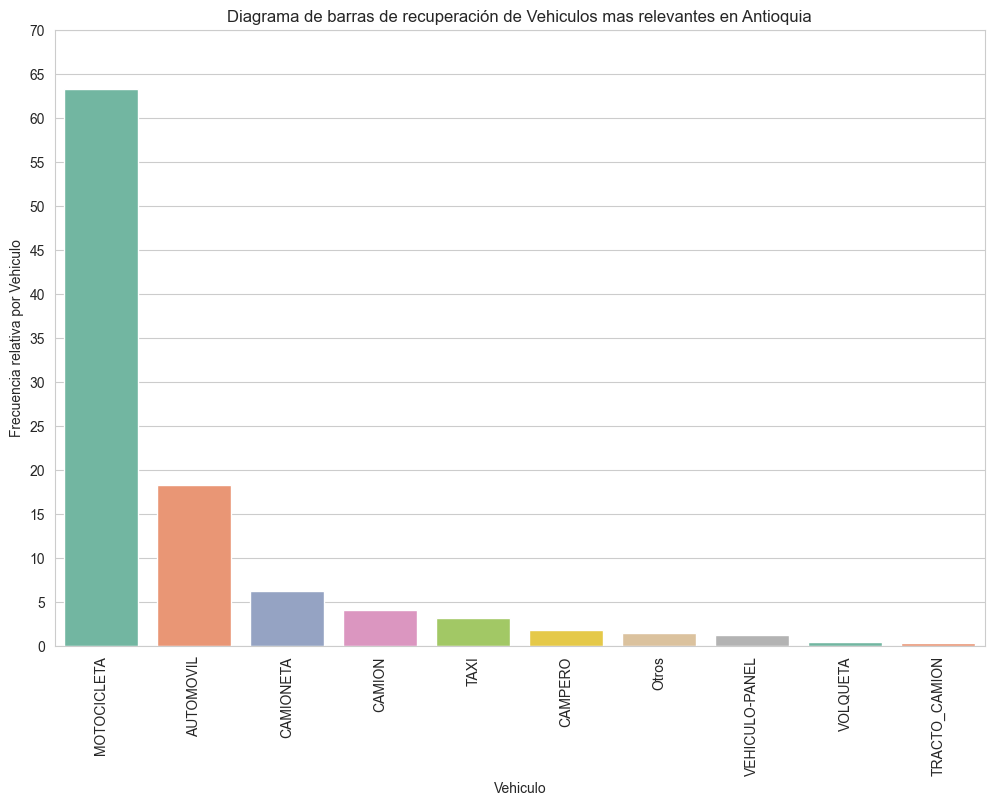

In [31]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo_antioquia,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes en Antioquia')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

/tmp/ipykernel_8852/3413346371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo_cundinamarca,x='Vehiculo',y = 'Valores', palette= 'Set2')


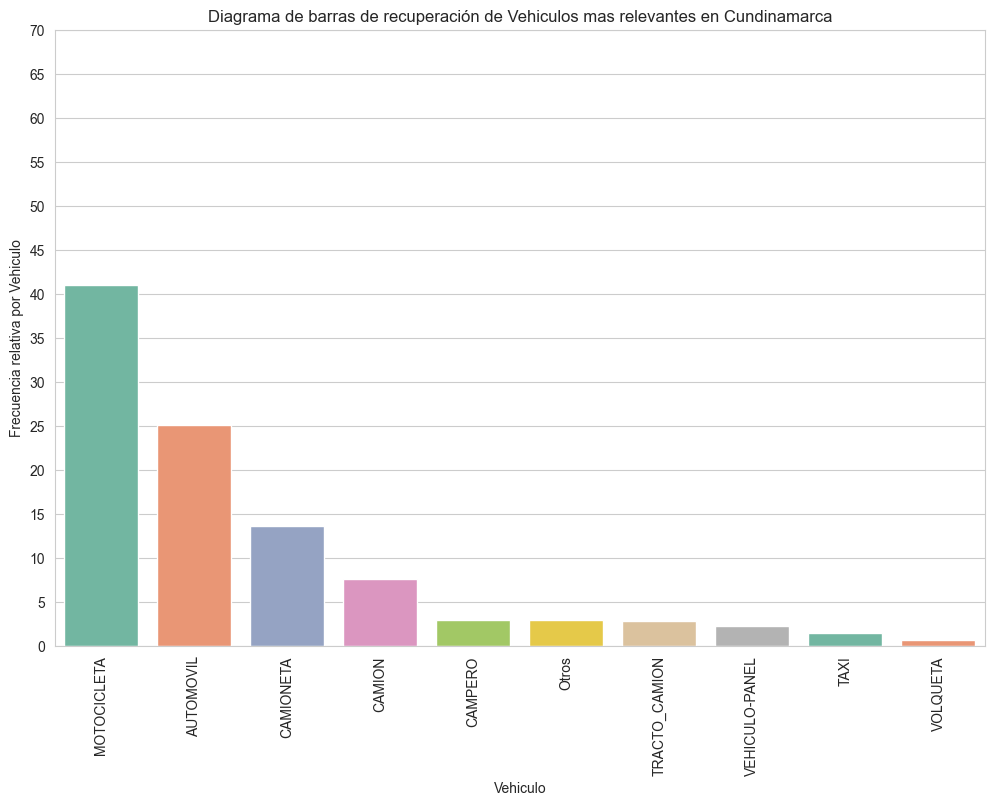

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo_cundinamarca,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes en Cundinamarca')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

/tmp/ipykernel_8852/1231679004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo_valle,x='Vehiculo',y = 'Valores', palette= 'Set2')


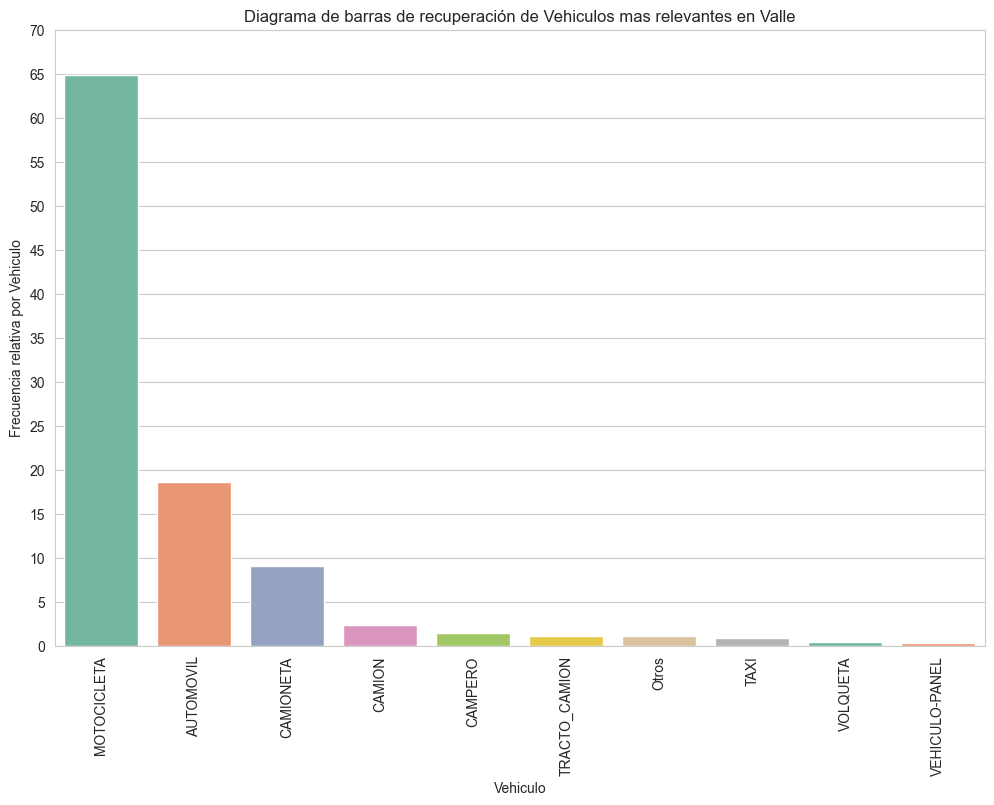

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo_valle,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes en Valle')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

/tmp/ipykernel_8852/3928706828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo_cauca,x='Vehiculo',y = 'Valores', palette= 'Set2')


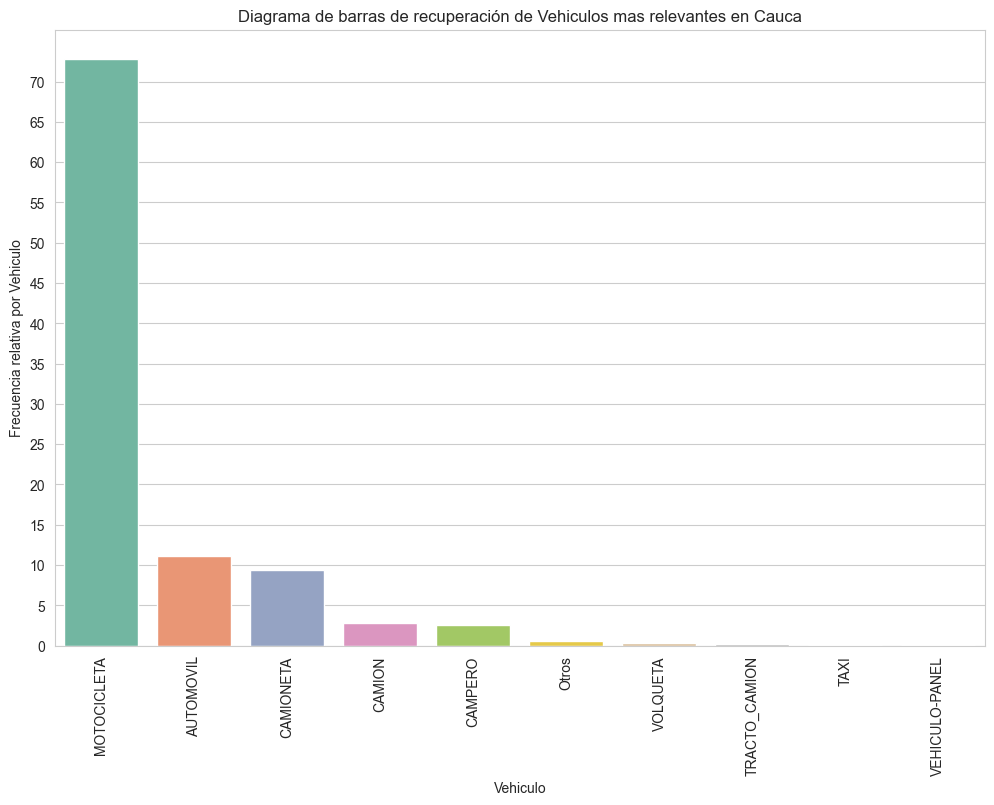

In [34]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo_cauca,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes en Cauca')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

/tmp/ipykernel_8852/143191939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_tipo_vehiculo_narino,x='Vehiculo',y = 'Valores', palette= 'Set2')


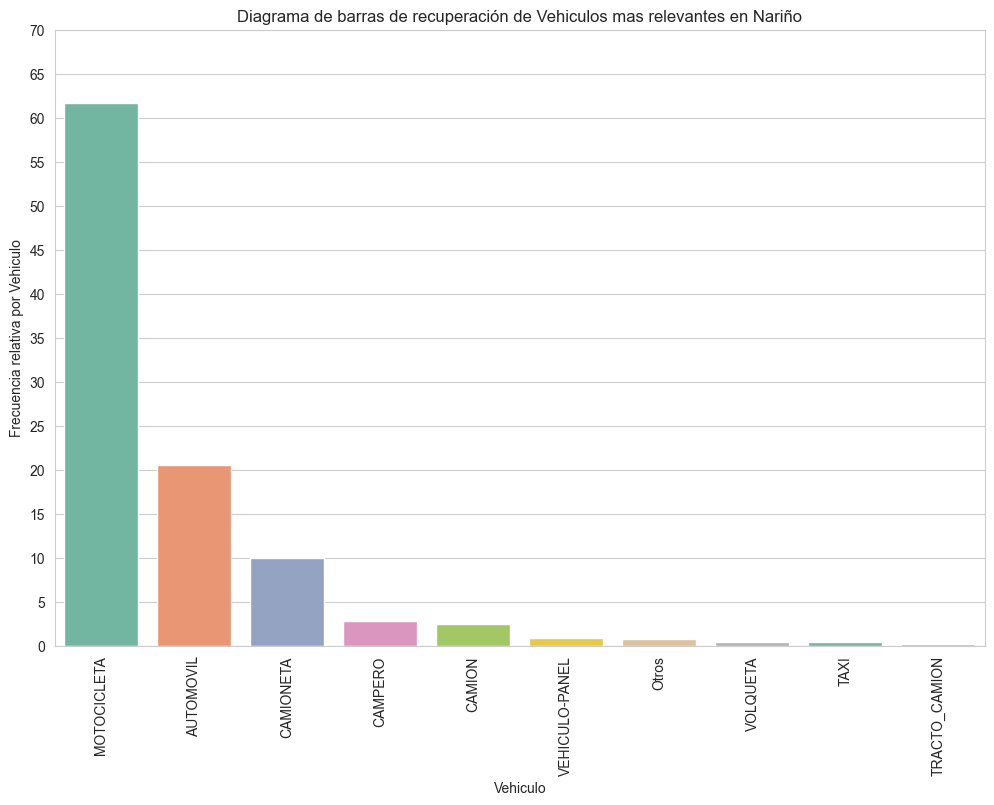

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(data = df_tipo_vehiculo_narino,x='Vehiculo',y = 'Valores', palette= 'Set2')
plt.xticks(rotation=90)
plt.ylabel('Frecuencia relativa por Vehiculo')
plt.title('Diagrama de barras de recuperación de Vehiculos mas relevantes en Nariño')

# Configurar el eje y con intervalos de 5
plt.yticks(range(0, int(df_tipo_vehiculo['Valores'].max()) + 5, 5))

plt.show()

In [36]:
#Filtrado de variables cuantitativas

variables_cuantitativas = df[['FECHA_RECUPERACION', 'CANTIDAD']]
print(variables_cuantitativas)

       FECHA_RECUPERACION  CANTIDAD
0              2010-01-01         1
1              2010-01-01         1
2              2010-01-01         1
3              2010-01-01         2
4              2010-01-01         1
...                   ...       ...
162704         2023-02-03         1
162705         2023-01-26         1
162706         2023-02-12         1
162707         2023-07-25         1
162708         2023-02-03         1

[162709 rows x 2 columns]


In [37]:
#Filtrado de variables cualitativas

variables_cualitativas = df[['DEPARTAMENTO','MUNICIPIO', 'TIPO_VEHICULO']]
print(variables_cualitativas)

              DEPARTAMENTO        MUNICIPIO TIPO_VEHICULO
0                ATLANTICO          MALAMBO   MOTOCICLETA
1                   BOYACA       TUNJA (CT)   MOTOCICLETA
2                   CALDAS   MANIZALES (CT)   MOTOCICLETA
3                    CESAR  VALLEDUPAR (CT)   MOTOCICLETA
4                  CORDOBA           LORICA   MOTOCICLETA
...                    ...              ...           ...
162704  NORTE DE SANTANDER           ABREGO      VOLQUETA
162705           SANTANDER          LEBRIJA      VOLQUETA
162706           SANTANDER          LEBRIJA      VOLQUETA
162707               SUCRE   SINCELEJO (CT)      VOLQUETA
162708               VALLE          JAMUNDI      VOLQUETA

[162709 rows x 3 columns]


In [38]:
# Calculamos la correlación entre las variables cuantitativas
df_correlacion = variables_cuantitativas.corr()
print(df_correlacion)

                    FECHA_RECUPERACION  CANTIDAD
FECHA_RECUPERACION            1.000000 -0.051915
CANTIDAD                     -0.051915  1.000000


In [39]:
df['FECHA_RECUPERACION'] = pd.to_datetime(df['FECHA_RECUPERACION'], format='%Y-%m-%d')

In [40]:
df['YEAR'] = df['FECHA_RECUPERACION'].dt.year
df['MONTH'] = df['FECHA_RECUPERACION'].dt.month

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162709 entries, 0 to 162708
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DEPARTAMENTO          162709 non-null  object        
 1   MUNICIPIO             162709 non-null  object        
 2   CIUDAD_DANE           162709 non-null  int64         
 3   TIPO_VEHICULO         162709 non-null  object        
 4   FECHA_RECUPERACION    162709 non-null  datetime64[ns]
 5   CANTIDAD              162709 non-null  int64         
 6   DepartamentoAgrupado  162709 non-null  object        
 7   VEHICULO_AGRUPADO     162709 non-null  object        
 8   YEAR                  162709 non-null  int32         
 9   MONTH                 162709 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(5)
memory usage: 11.2+ MB


In [42]:
df.sample(10)

,DEPARTAMENTO,MUNICIPIO,CIUDAD_DANE,TIPO_VEHICULO,FECHA_RECUPERACION,CANTIDAD,DepartamentoAgrupado,VEHICULO_AGRUPADO,YEAR,MONTH
97372,ANTIOQUIA,SANTA BARBARA,5679,AUTOMOVIL,2018-03-26,1,ANTIOQUIA,AUTOMOVIL,2018,3
117357,CUNDINAMARCA,BOGOTA D.C. (CT),11001,AUTOMOVIL,2020-01-13,1,CUNDINAMARCA,AUTOMOVIL,2020,1
25181,CUNDINAMARCA,GIRARDOT,25307,MOTOCICLETA,2012-02-28,3,CUNDINAMARCA,MOTOCICLETA,2012,2
132776,NORTE DE SANTANDER,VILLA DEL ROSARIO,54874,MOTOCICLETA,2021-07-27,1,NORTE DE SANTANDER,MOTOCICLETA,2021,7
20579,CAQUETA,FLORENCIA (CT),18001,CAMIONETA,2011-09-27,3,Otros,CAMIONETA,2011,9
38638,ANTIOQUIA,BELLO,5088,MOTOCICLETA,2013-04-29,1,ANTIOQUIA,MOTOCICLETA,2013,4
44986,CASANARE,YOPAL (CT),85001,MOTOCICLETA,2013-11-22,1,Otros,MOTOCICLETA,2013,11
141314,ANTIOQUIA,SANTO DOMINGO,5690,MOTOCICLETA,2022-03-25,1,ANTIOQUIA,MOTOCICLETA,2022,3
155678,CESAR,LA PAZ,20621,MOTOCICLETA,2023-01-27,1,CESAR,MOTOCICLETA,2023,1
131314,VALLE,CALI (CT),76001,CAMIONETA,2021-05-18,1,VALLE,CAMIONETA,2021,5


In [43]:
#Filtrado de variables cuantitativas

variables_cuantitativas = df[['FECHA_RECUPERACION', 'CANTIDAD', 'MONTH', 'YEAR']]
print(variables_cuantitativas)

       FECHA_RECUPERACION  CANTIDAD  MONTH  YEAR
0              2010-01-01         1      1  2010
1              2010-01-01         1      1  2010
2              2010-01-01         1      1  2010
3              2010-01-01         2      1  2010
4              2010-01-01         1      1  2010
...                   ...       ...    ...   ...
162704         2023-02-03         1      2  2023
162705         2023-01-26         1      1  2023
162706         2023-02-12         1      2  2023
162707         2023-07-25         1      7  2023
162708         2023-02-03         1      2  2023

[162709 rows x 4 columns]


In [44]:
# Calculamos la correlación entre las variables cuantitativas
df_correlacion = variables_cuantitativas.corr()
print(df_correlacion)

                    FECHA_RECUPERACION  CANTIDAD     MONTH      YEAR
FECHA_RECUPERACION            1.000000 -0.051915  0.000539  0.997552
CANTIDAD                     -0.051915  1.000000 -0.019920 -0.050457
MONTH                         0.000539 -0.019920  1.000000 -0.069141
YEAR                          0.997552 -0.050457 -0.069141  1.000000


In [45]:
#Realizamos estadisticas descriptivas

df_estadistica = df['CANTIDAD'].describe()
print(df_estadistica)

count    162709.000000
mean          1.322748
std           1.064924
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          89.000000
Name: CANTIDAD, dtype: float64


In [46]:
# Calcular el percentil 90 de la columna CANTIDAD
percentil_90 = df['CANTIDAD'].quantile(0.9)
print(percentil_90)

2.0


In [47]:
#Realizamos una tabla de contingencia para analizar la relación entre departamentos y tipo de vehiculos,

df_tabla = pd.crosstab(df['DepartamentoAgrupado'], df['VEHICULO_AGRUPADO'])
print(df_tabla)


VEHICULO_AGRUPADO     AUTOMOVIL  CAMION  CAMIONETA  CAMPERO  MOTOCICLETA  \
DepartamentoAgrupado                                                       
ANTIOQUIA                  4403     978       1503      440        15304   
ATLANTICO                  1279     340        383       37         5402   
BOLIVAR                     344      80        168       29         3414   
CAUCA                      1485     372       1255      333         9707   
CESAR                       464     218        366       54         3764   
CORDOBA                     303     127        192       41         3445   
CUNDINAMARCA               4620    1385       2505      546         7548   
GUAJIRA                     656     194        538       34         2820   
HUILA                       214      69        217       40         5064   
META                        437     114        392       91         4162   
NARINO                     2055     248        998      283         6185   
NORTE DE SAN

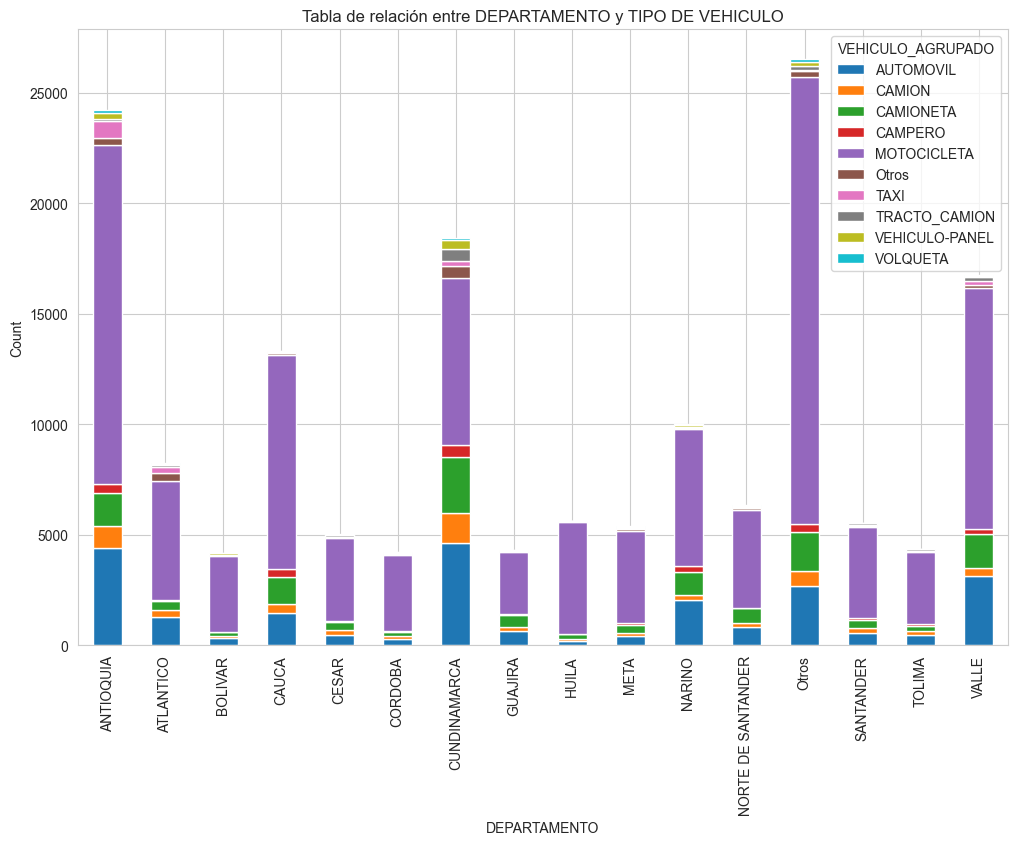

In [48]:
#Realizamos un grafico de barras para la relación

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (12, 8)
#plt.figure(figsize=(30, 15))
df_tabla.plot(kind='bar', stacked=True)
plt.title('Tabla de relación entre DEPARTAMENTO y TIPO DE VEHICULO')
plt.xlabel('DEPARTAMENTO')
plt.ylabel('Count')
plt.show()

In [49]:
df_tabla2 = pd.crosstab(df['YEAR'], df['CANTIDAD'])
print(df_tabla2)

CANTIDAD     1     2    3    4    5   6   7   8   9   10  ...  30  32  35  37  \
YEAR                                                      ...                   
2010       9177  1285  451  226  134  65  34  20  10   9  ...   0   0   0   0   
2011       9222  1373  443  235  133  80  34  18   9  12  ...   0   0   0   0   
2012       9005  1379  458  205  132  57  34  16  11   7  ...   0   0   0   0   
2013       9244  1303  495  219  138  66  27  23   6   4  ...   0   0   1   0   
2014       9424  1387  446  225   96  53  35  22   5   5  ...   1   0   0   0   
2015      10060  1370  472  238  126  53  23  14  17   7  ...   0   1   0   0   
2016      10160  1308  467  206  106  61  34  17   9   7  ...   0   0   0   0   
2017       9886  1260  407  157   92  48  25   9  14   6  ...   0   0   0   0   
2018       9196  1239  423  158  105  44  30  17   6   5  ...   0   0   0   0   
2019       9540  1107  364  179   77  44  24  17  15   8  ...   0   0   0   0   
2020      10394   135   26  

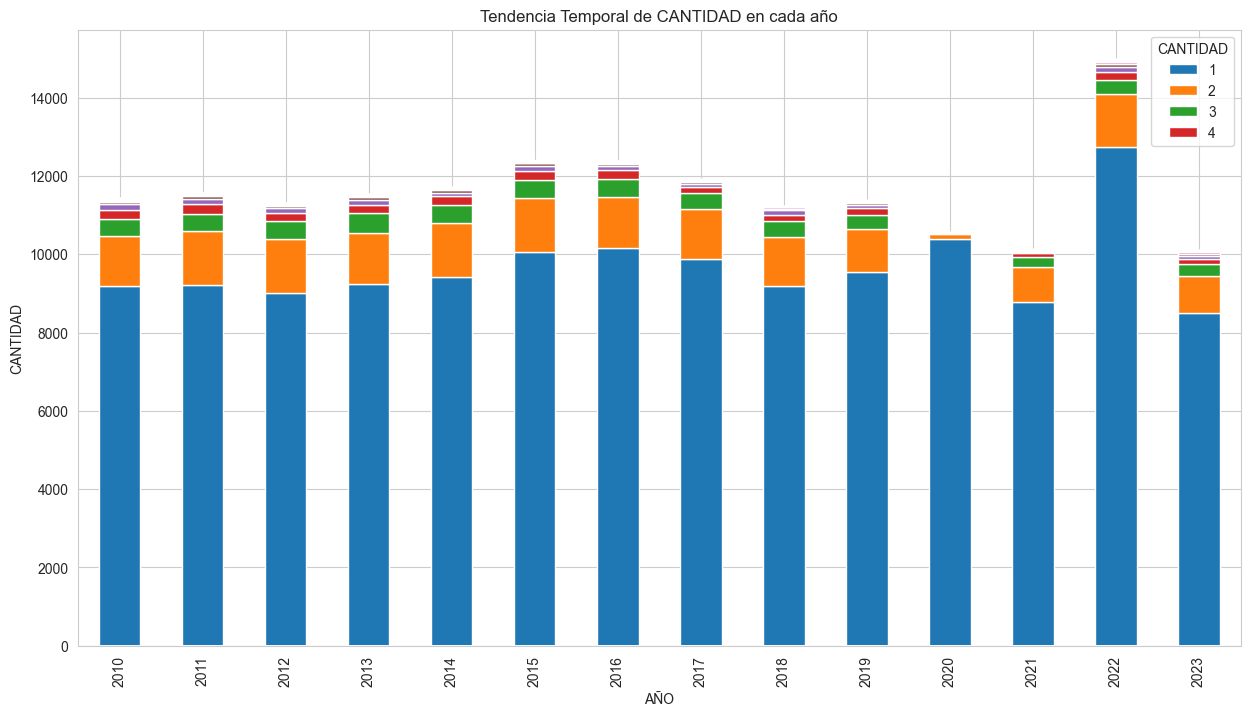

In [50]:
# Crear un gráfico de línea para visualizar la tendencia temporal de CANTIDAD

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla2.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('Tendencia Temporal de CANTIDAD en cada año')
plt.xlabel('AÑO')
plt.ylabel('CANTIDAD')
plt.show()

In [51]:
# Convertir FECHA_RECUPERACION a formato de fecha

df_tabla3 = pd.crosstab(df['MONTH'], df['CANTIDAD'])
print(df_tabla3)

CANTIDAD     1     2    3    4    5   6   7   8   9   10  ...  30  32  35  37  \
MONTH                                                     ...                   
1         14492  1770  526  272  164  70  37  29  28  10  ...   0   0   1   0   
2         13344  1587  565  265  161  86  48  31  20  14  ...   0   0   0   0   
3         13223  1633  569  269  165  86  45  21  20  14  ...   1   0   0   0   
4         11190  1394  479  242  118  71  28  18  11   5  ...   0   0   0   0   
5         12053  1523  507  254  129  60  44  22  15   8  ...   0   0   0   0   
6         11737  1496  500  201  113  71  36  29   7  10  ...   0   0   0   1   
7         11439  1314  482  210  110  62  41  10  13   5  ...   0   0   0   0   
8         11044  1323  422  193  110  68  26  19   8   7  ...   0   0   0   0   
9         10611  1239  392  211  111  46  32  14  13   5  ...   0   1   0   0   
10        10171  1166  385  146   84  38  22  14   5   4  ...   0   0   0   0   
11         9016  1043  334  

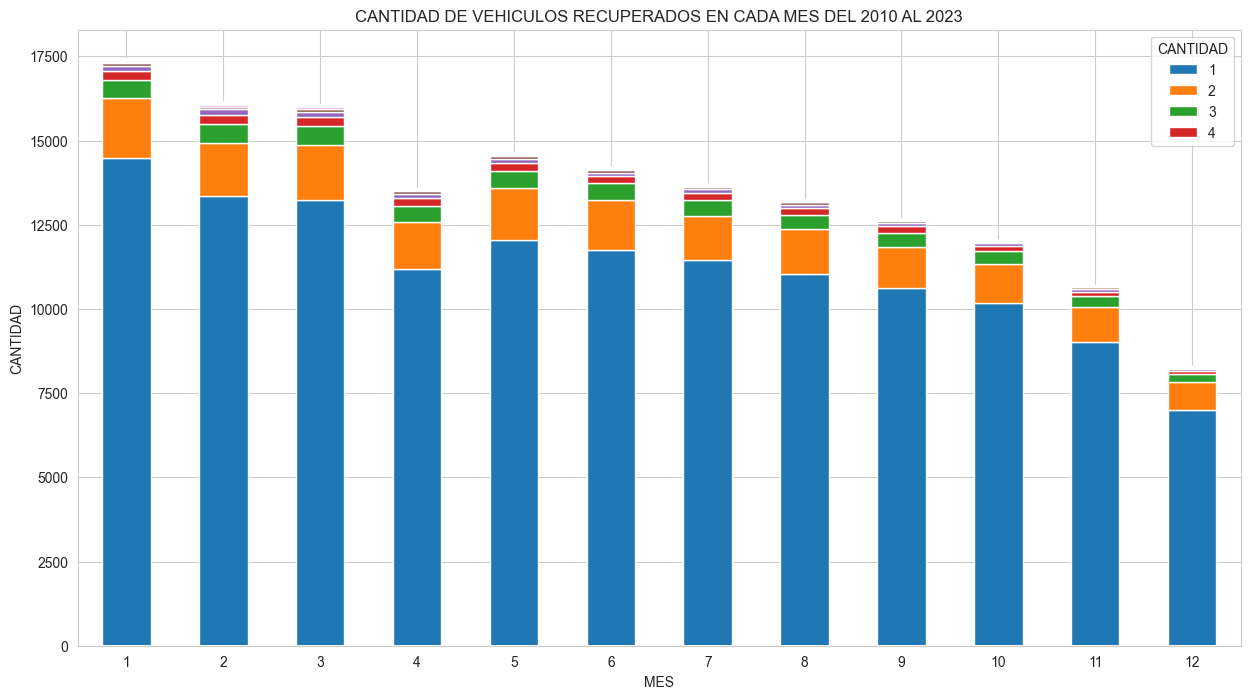

In [52]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL 2010 AL 2023')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

In [53]:
filtro_2010 = df[df.YEAR == 2010]
filtro_2011 = df[df.YEAR == 2011]
filtro_2012 = df[df.YEAR == 2012]
filtro_2013 = df[df.YEAR == 2013]
filtro_2014 = df[df.YEAR == 2014]
filtro_2015 = df[df.YEAR == 2015]
filtro_2016 = df[df.YEAR == 2016]
filtro_2017 = df[df.YEAR == 2017]
filtro_2018 = df[df.YEAR == 2018]
filtro_2019 = df[df.YEAR == 2019]
filtro_2020 = df[df.YEAR == 2020]
filtro_2021 = df[df.YEAR == 2021]
filtro_2022 = df[df.YEAR == 2022]
filtro_2023 = df[df.YEAR == 2023]

In [54]:
df_tabla3_2010 = pd.crosstab(filtro_2010['MONTH'], filtro_2010['CANTIDAD'])
df_tabla3_2011 = pd.crosstab(filtro_2011['MONTH'], filtro_2011['CANTIDAD'])
df_tabla3_2012 = pd.crosstab(filtro_2012['MONTH'], filtro_2012['CANTIDAD'])
df_tabla3_2013 = pd.crosstab(filtro_2013['MONTH'], filtro_2013['CANTIDAD'])
df_tabla3_2014 = pd.crosstab(filtro_2014['MONTH'], filtro_2014['CANTIDAD'])
df_tabla3_2015 = pd.crosstab(filtro_2015['MONTH'], filtro_2015['CANTIDAD'])
df_tabla3_2016 = pd.crosstab(filtro_2016['MONTH'], filtro_2016['CANTIDAD'])
df_tabla3_2017 = pd.crosstab(filtro_2017['MONTH'], filtro_2017['CANTIDAD'])
df_tabla3_2018 = pd.crosstab(filtro_2018['MONTH'], filtro_2018['CANTIDAD'])
df_tabla3_2019 = pd.crosstab(filtro_2019['MONTH'], filtro_2019['CANTIDAD'])
df_tabla3_2020 = pd.crosstab(filtro_2020['MONTH'], filtro_2020['CANTIDAD'])
df_tabla3_2021 = pd.crosstab(filtro_2021['MONTH'], filtro_2021['CANTIDAD'])
df_tabla3_2022 = pd.crosstab(filtro_2022['MONTH'], filtro_2022['CANTIDAD'])
df_tabla3_2023 = pd.crosstab(filtro_2023['MONTH'], filtro_2023['CANTIDAD'])

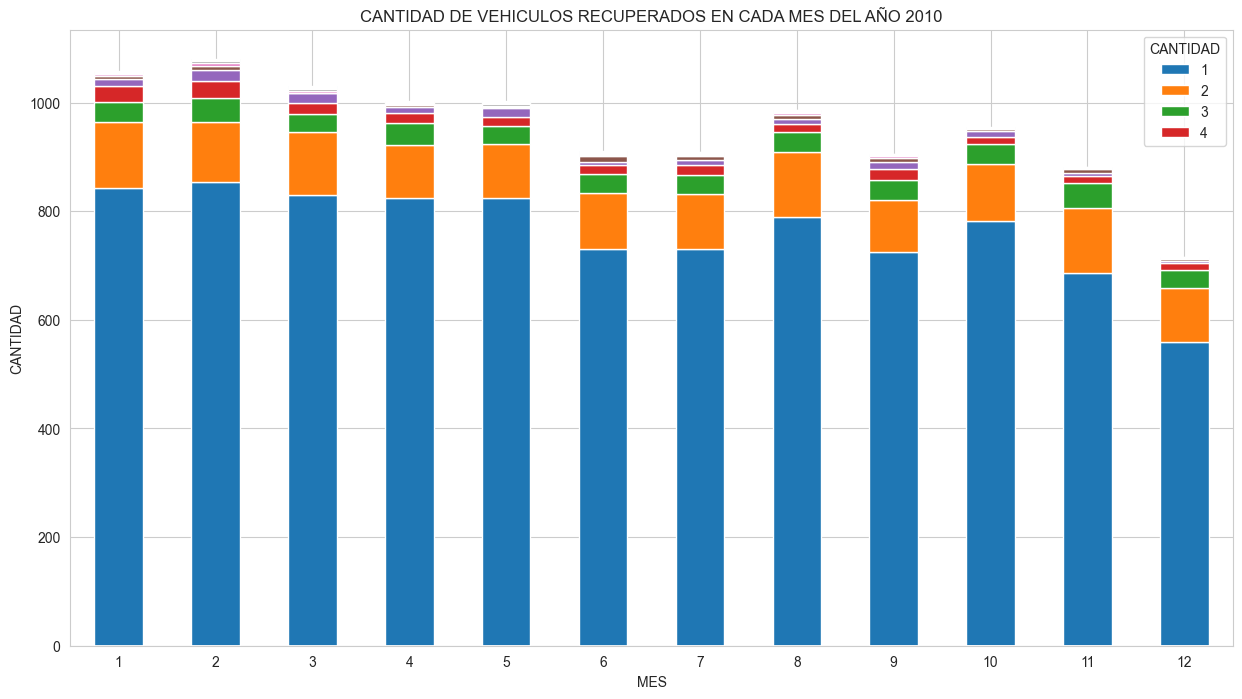

In [55]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2010.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2010')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

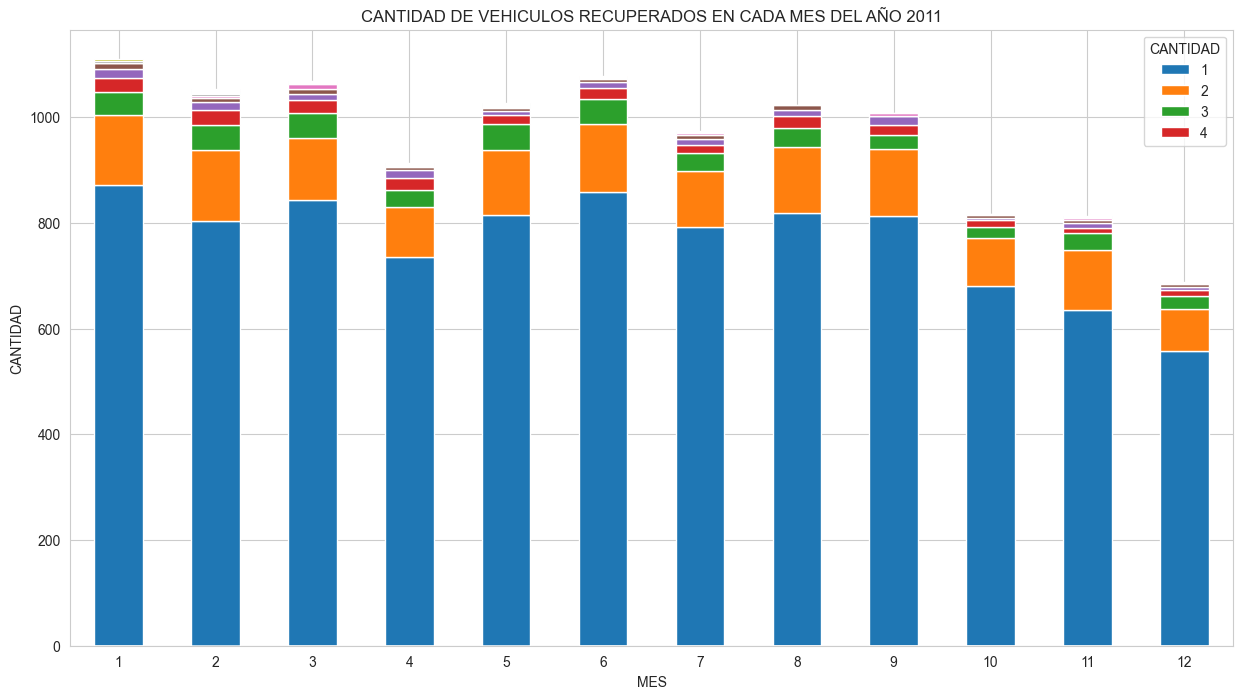

In [56]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2011.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2011')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

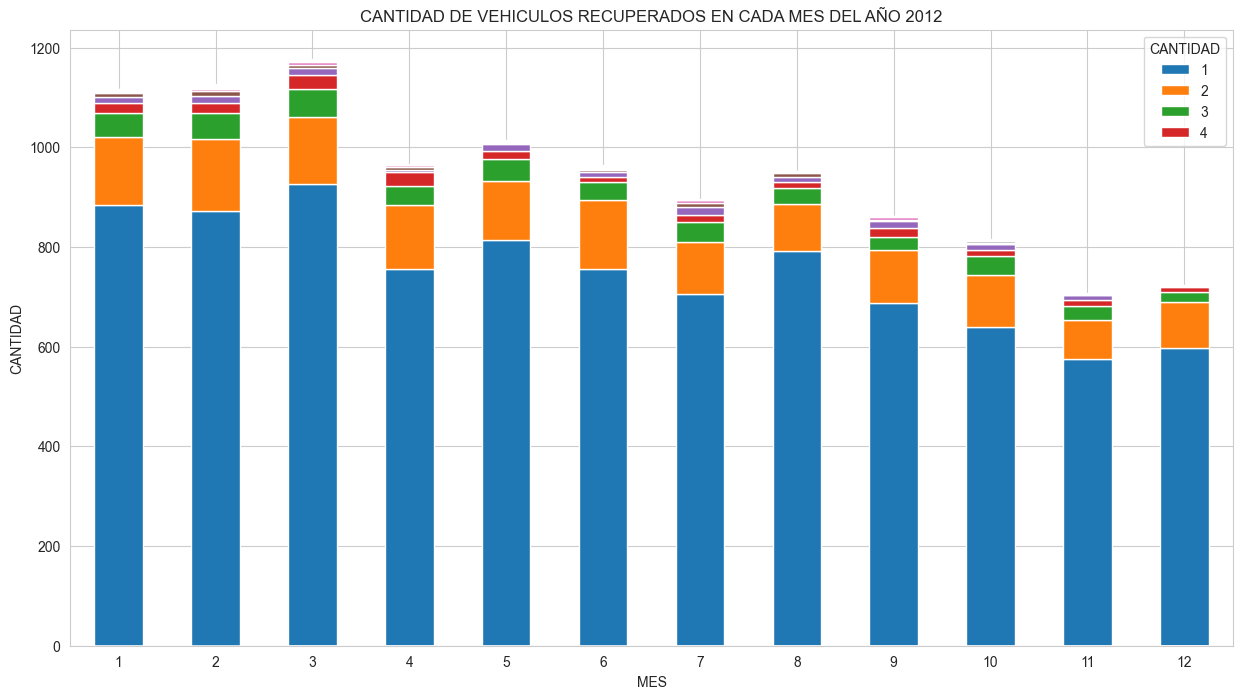

In [57]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2012.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2012')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

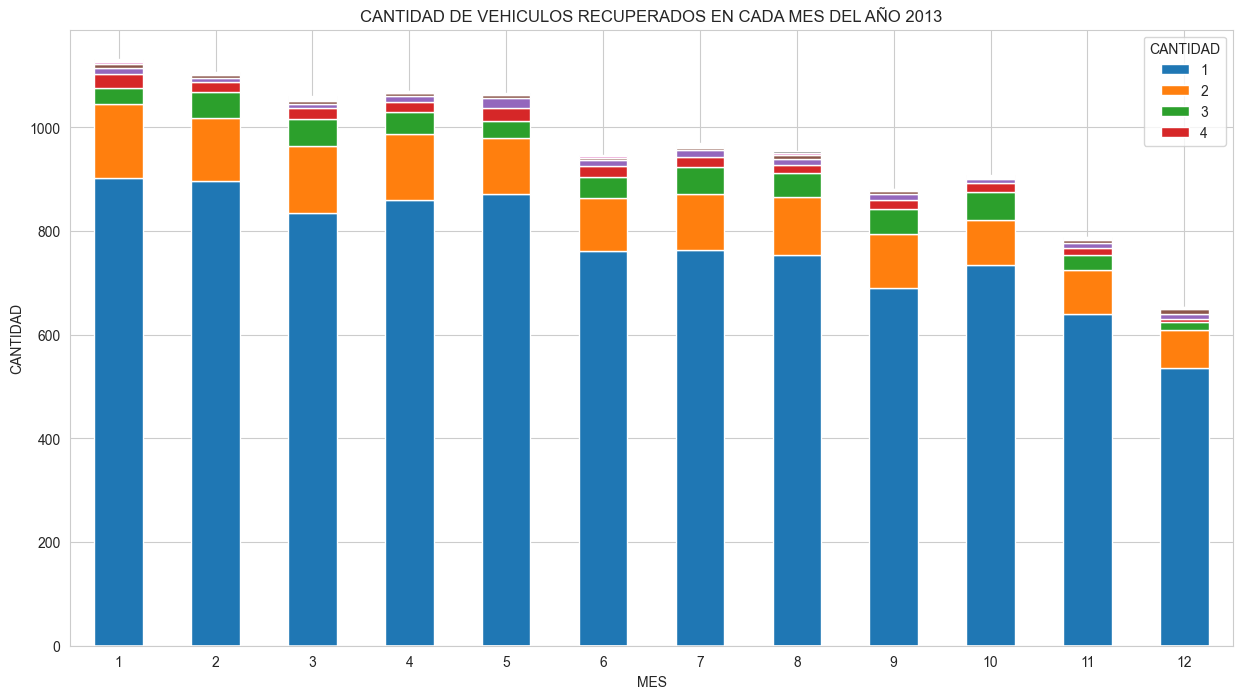

In [58]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2013.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2013')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

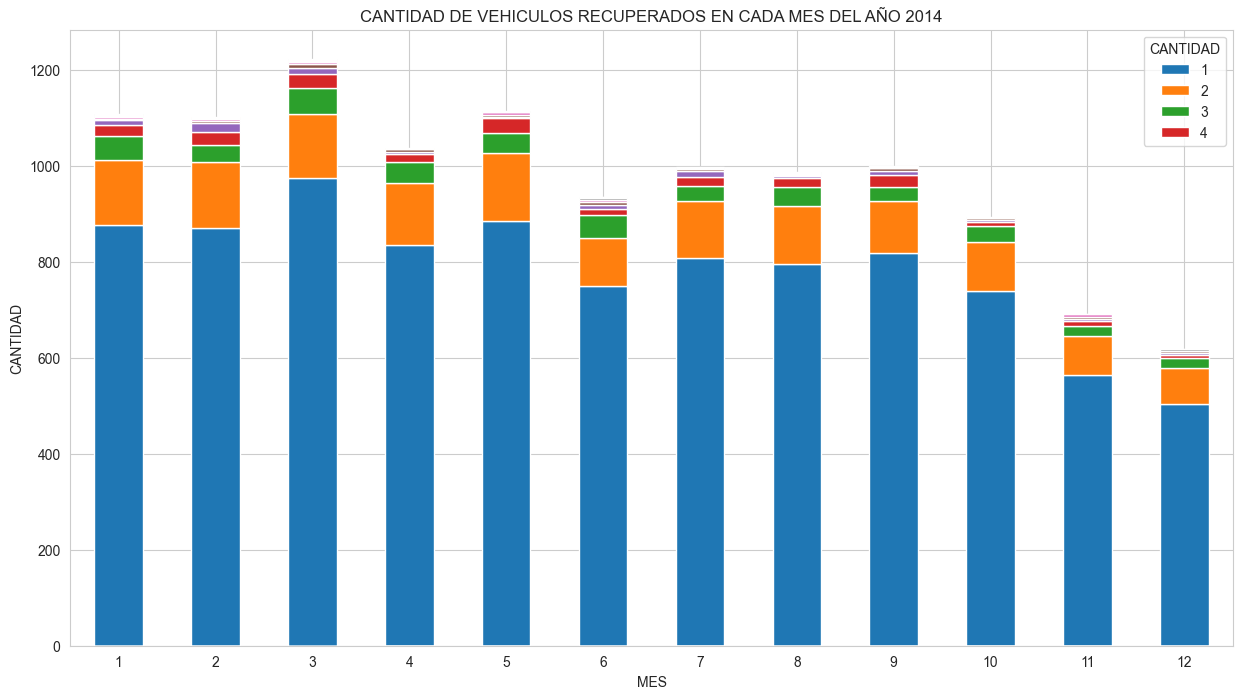

In [59]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2014.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2014')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

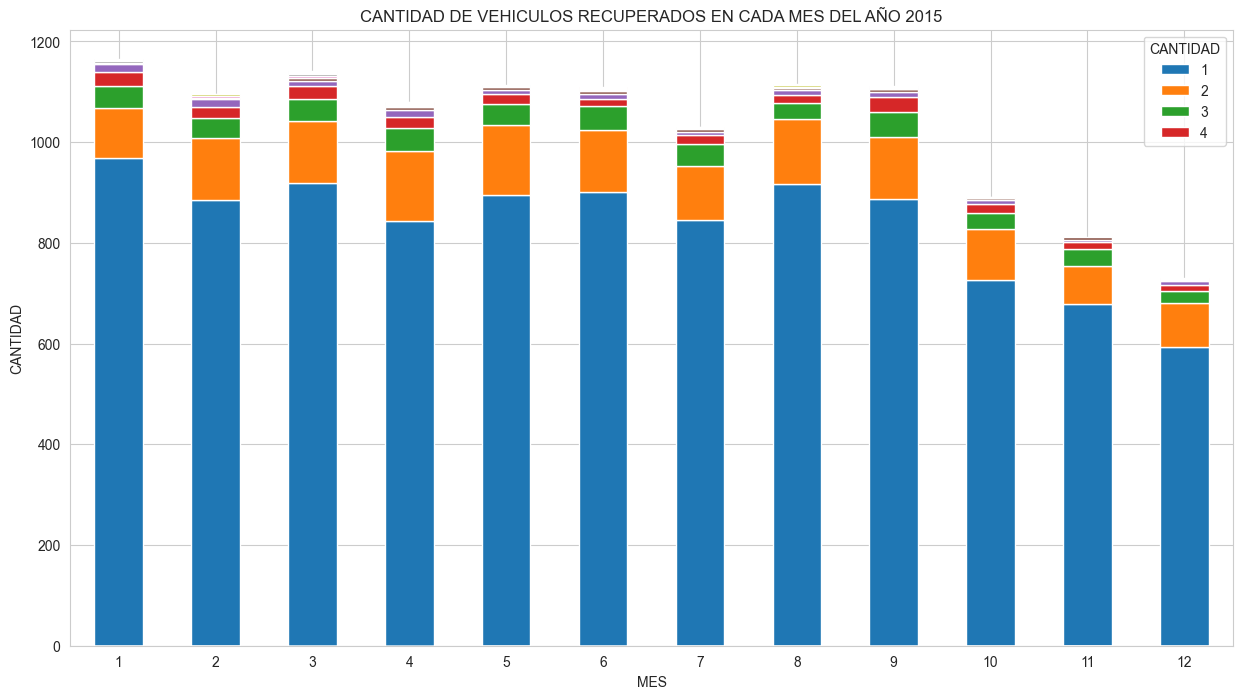

In [60]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2015.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2015')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

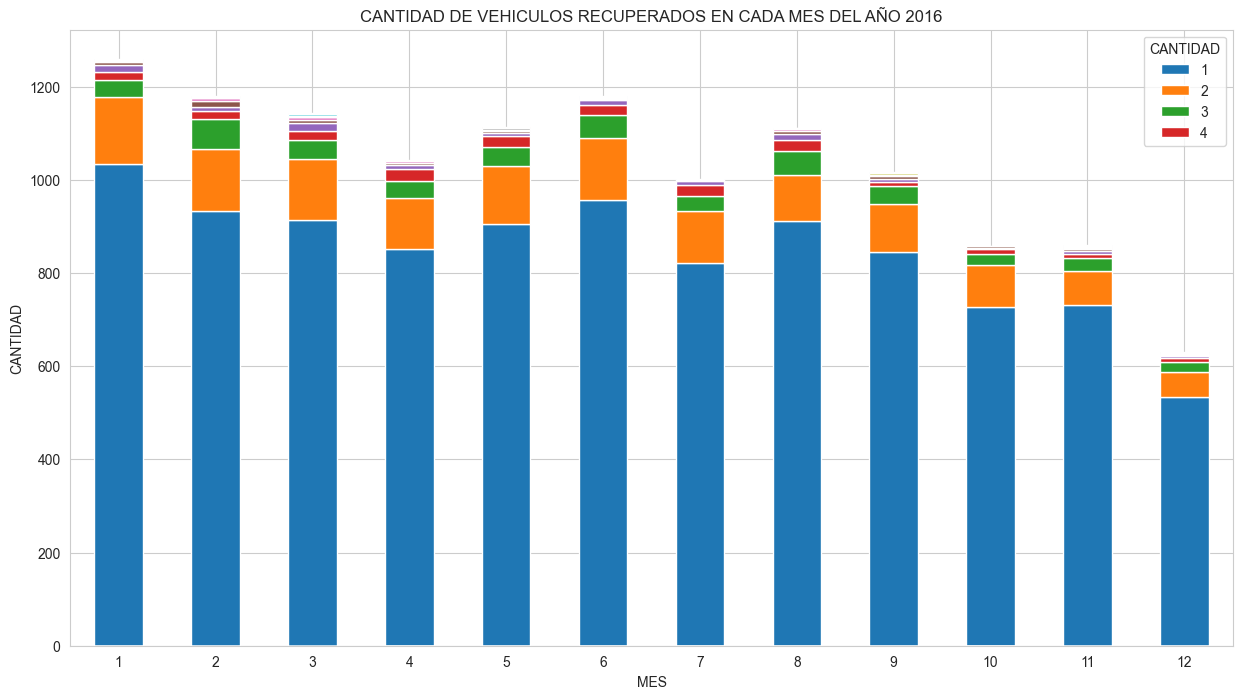

In [61]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2016.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2016')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

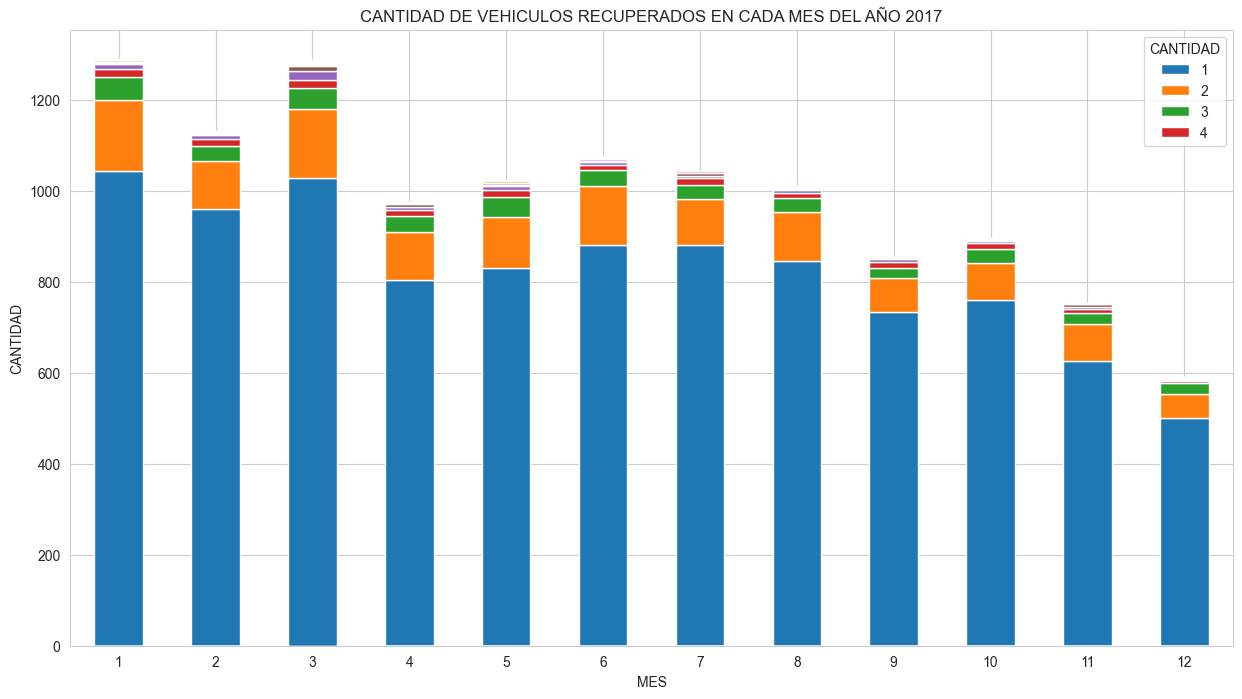

In [62]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2017.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2017')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

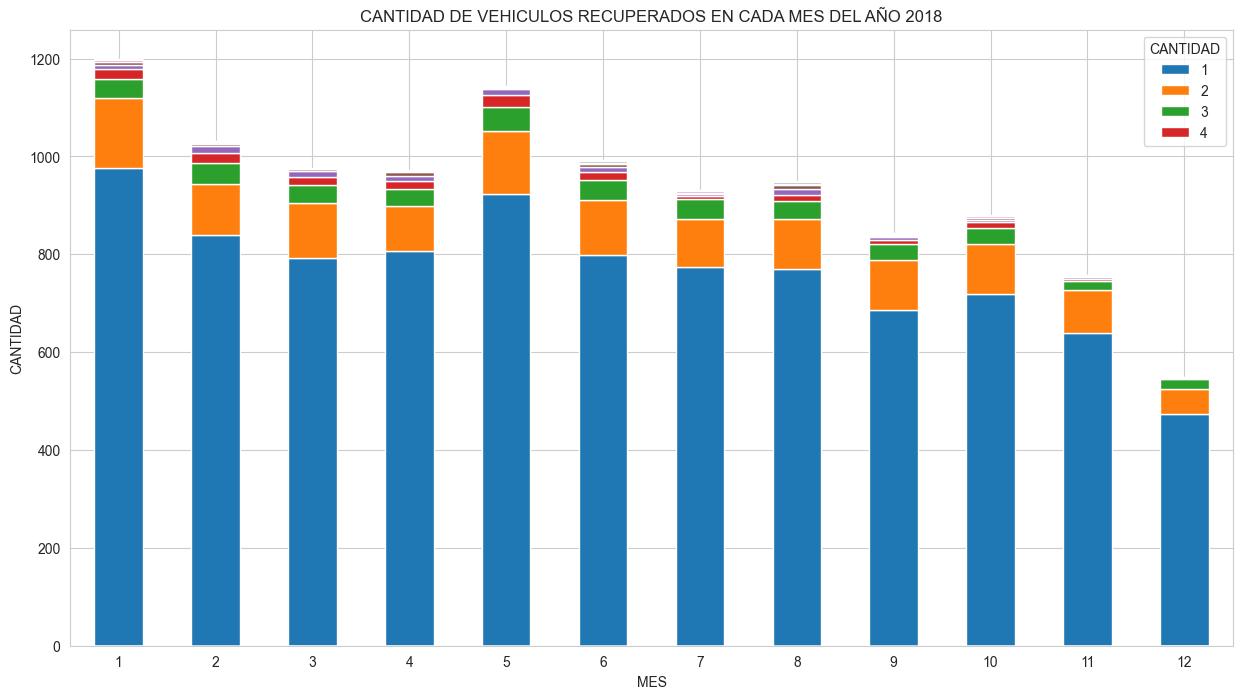

In [63]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2018.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2018')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

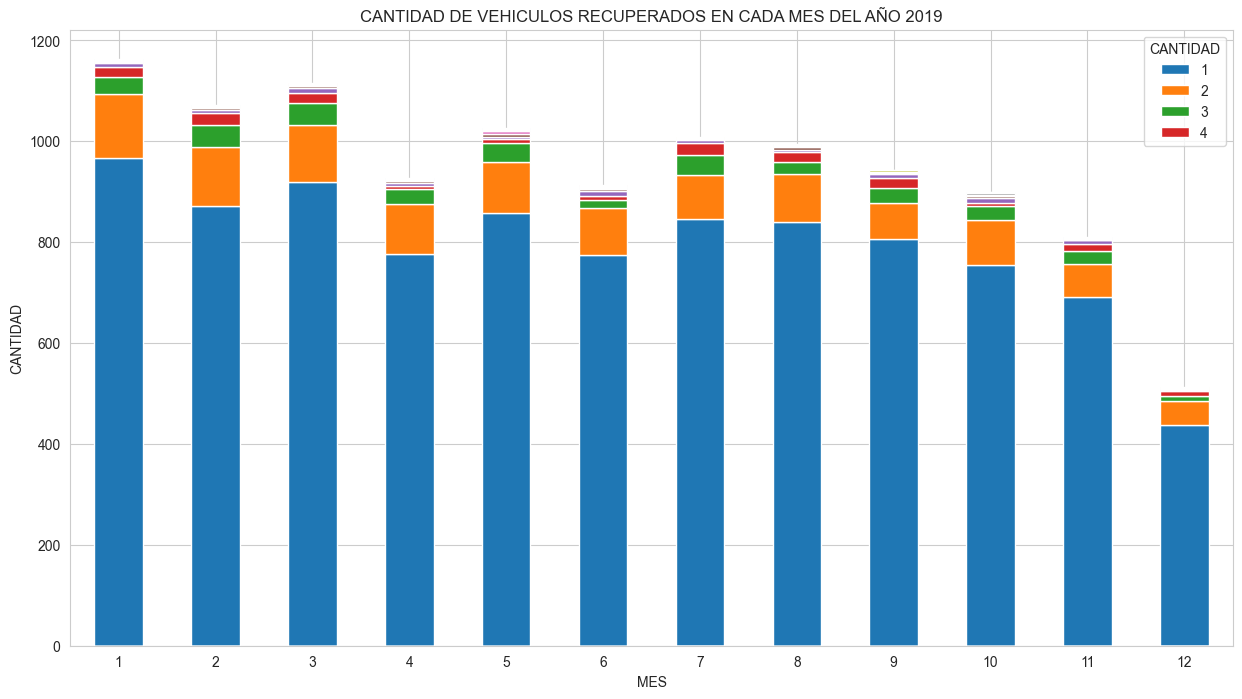

In [64]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2019.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2019')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

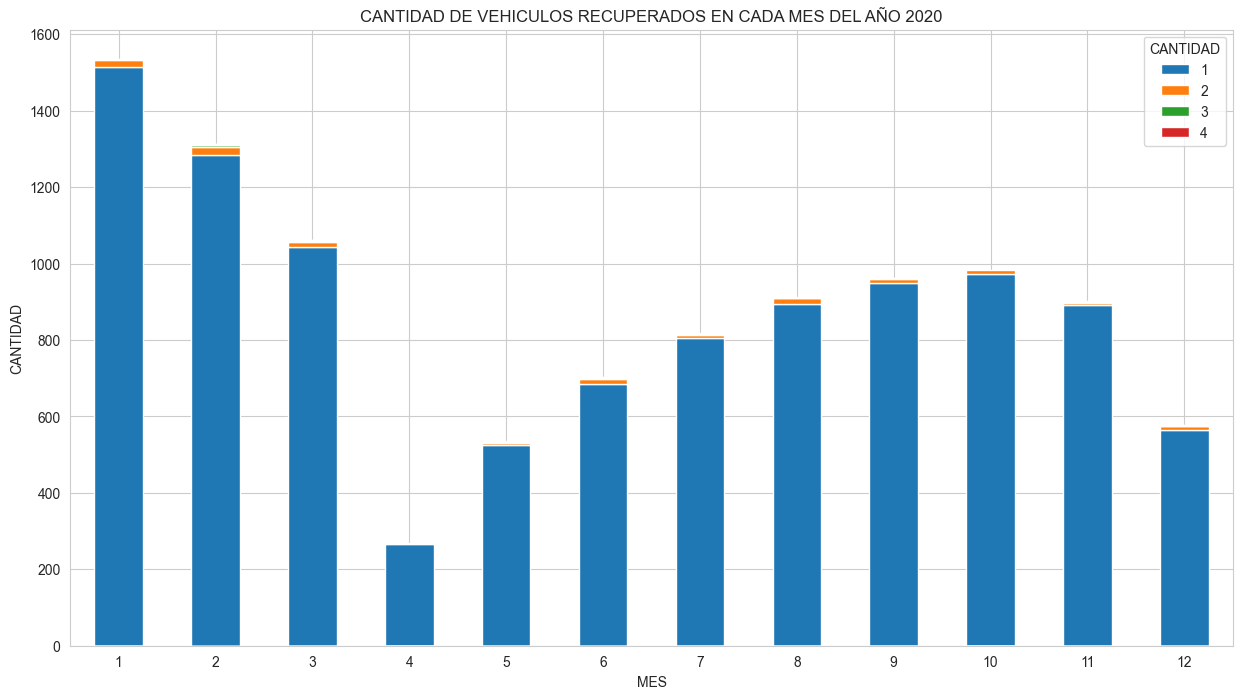

In [65]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2020.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2020')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

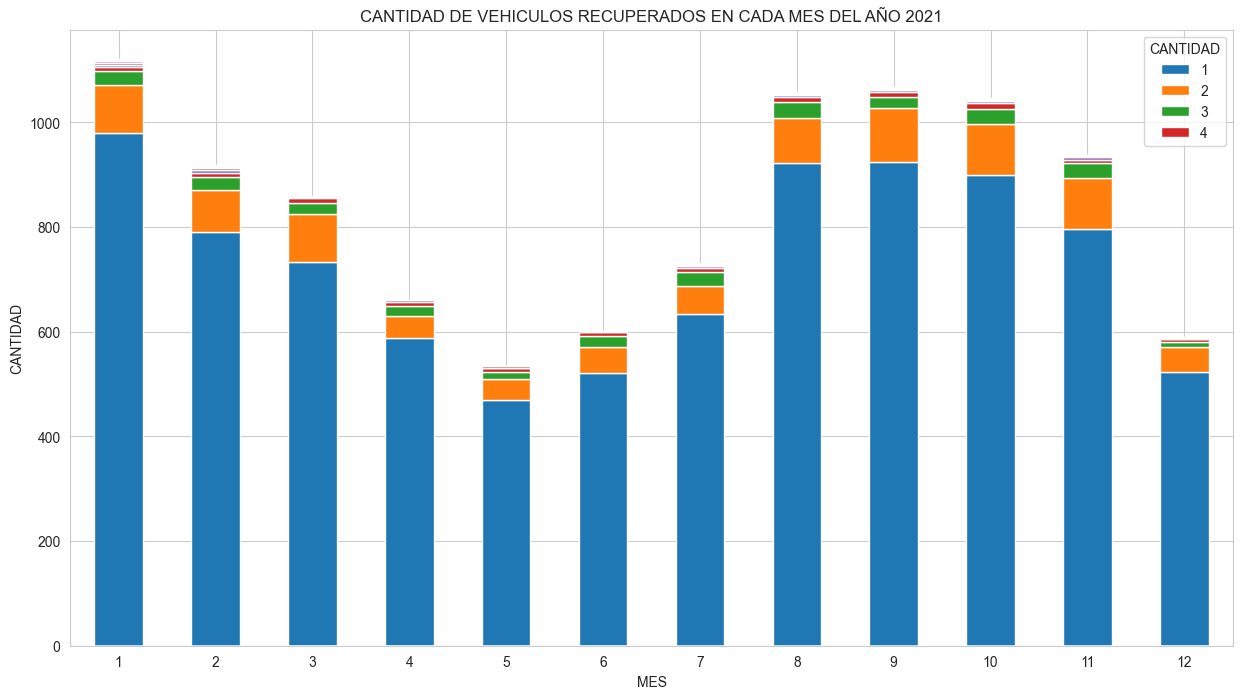

In [66]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2021.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2021')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

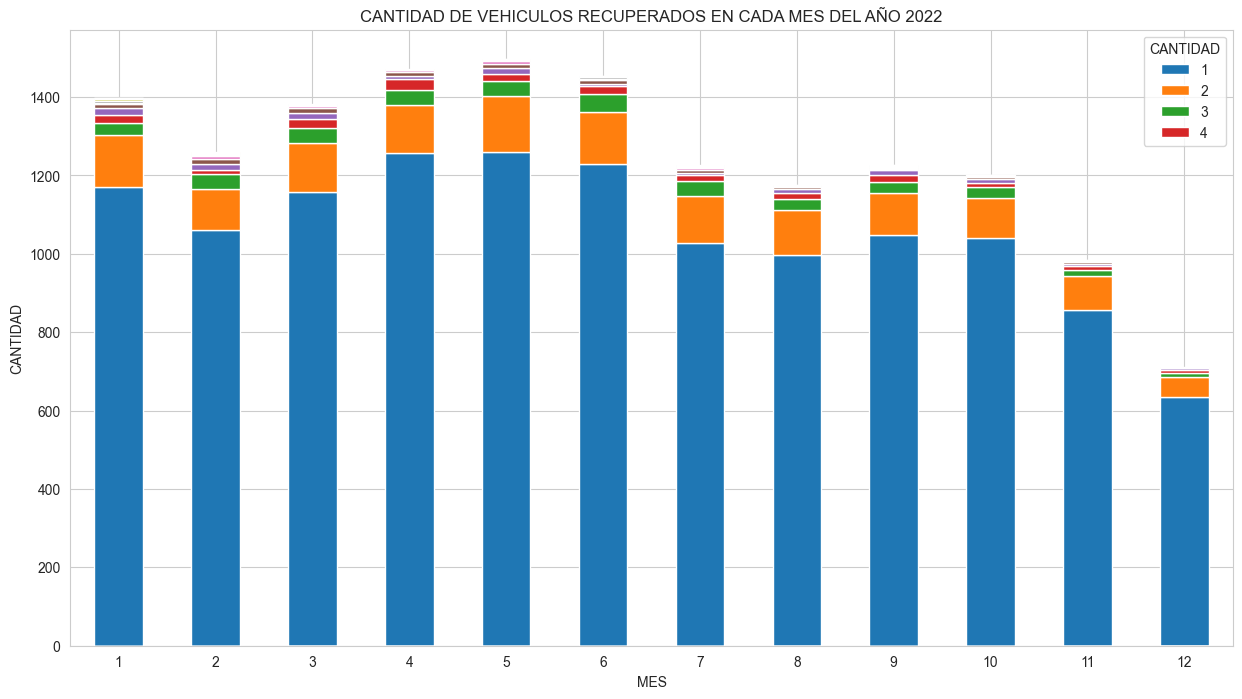

In [67]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2022.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2022')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

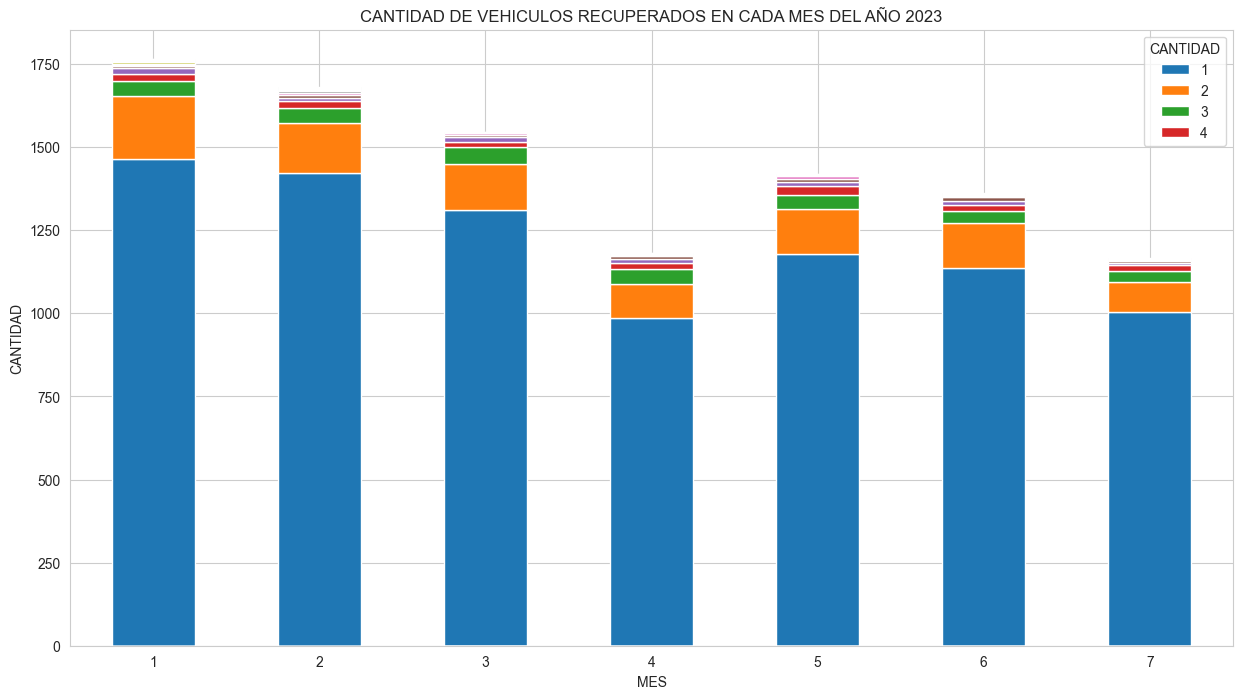

In [68]:
# Crear un gráfico para visualizar la cantidad de vehiculos recuperados en cada mes entre los años 2010 a 2023

sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (15, 8)
ax = df_tabla3_2023.plot(kind='bar', stacked=True)

# Filtrar las etiquetas para mostrar en la leyenda
legend_labels = {str(i): str(i) for i in range(1, 5)}
legend_labels = {str(k): v for k, v in legend_labels.items()}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels[label] for label in labels if label in legend_labels]
ax.legend(handles, new_labels, title='CANTIDAD')

plt.title('CANTIDAD DE VEHICULOS RECUPERADOS EN CADA MES DEL AÑO 2023')
plt.xlabel('MES')
plt.xticks(rotation=360)
plt.ylabel('CANTIDAD')
plt.show()

In [69]:
# Calcular la cantidad total por mes y año
df_cantidad_total = df.groupby(['YEAR', 'MONTH'])['CANTIDAD'].sum().reset_index()
# Convertir 'AÑO' y 'MES' de nuevo a formato de fecha completa para poder utilizarlo en el gráfico
df_cantidad_total['FECHA_RECUPERACION'] = pd.to_datetime(df_cantidad_total['YEAR'].astype(str) + '-' + df_cantidad_total['MONTH'].astype(str), format='%Y-%m')

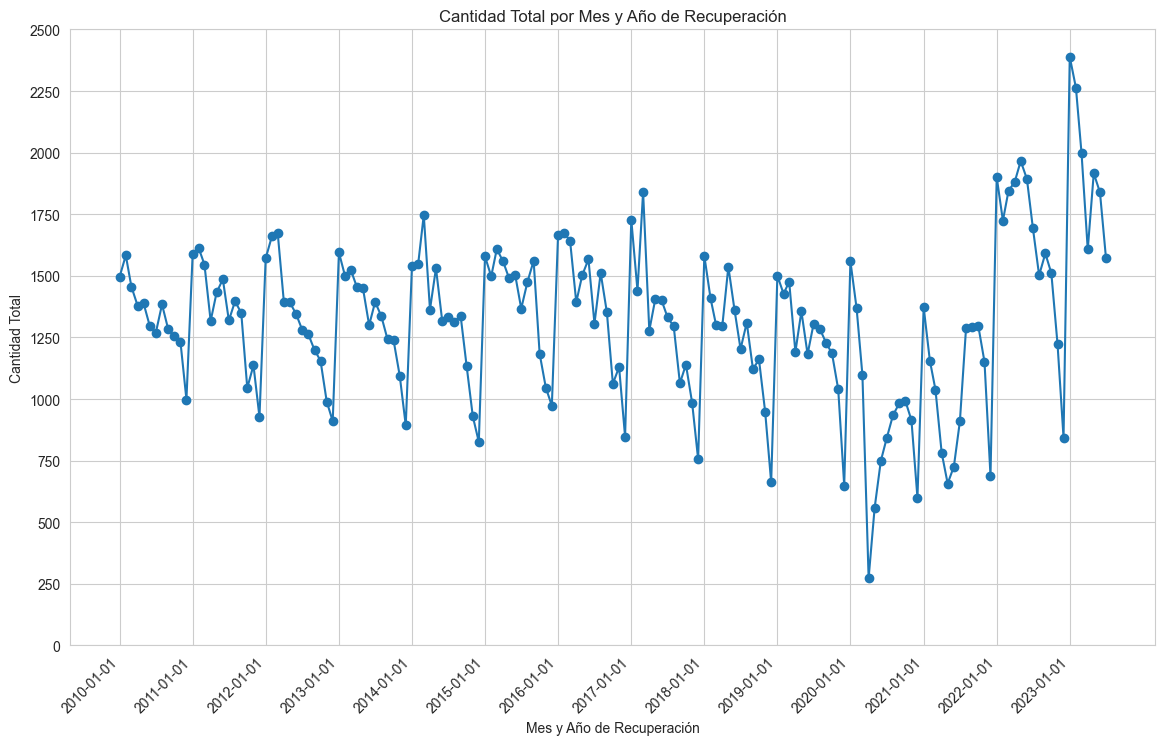

In [70]:
# Crear el gráfico de línea
plt.figure(figsize=(14, 8))
plt.plot(df_cantidad_total['FECHA_RECUPERACION'], df_cantidad_total['CANTIDAD'], marker='o')
plt.title('Cantidad Total por Mes y Año de Recuperación')
plt.xlabel('Mes y Año de Recuperación')
plt.ylabel('Cantidad Total')
# Establecer la escala del eje Y en incrementos de 250
yticks = range(0, int(max(df_cantidad_total['CANTIDAD'])) + 250, 250)
plt.yticks(yticks)
# Formatear las etiquetas del eje x para mostrar solo el año
plt.xticks(df_cantidad_total['FECHA_RECUPERACION'].dt.to_period('Y').astype(str).unique(), rotation=45, ha='right')
plt.grid(True)
plt.show()

In [78]:
# Agrupar por año y tipo de vehículo y sumar las cantidades
tendencia_temporal_tipo_vehiculo = df.groupby(['YEAR', 'VEHICULO_AGRUPADO'])['CANTIDAD'].sum().unstack()

<Figure size 1400x1000 with 0 Axes>

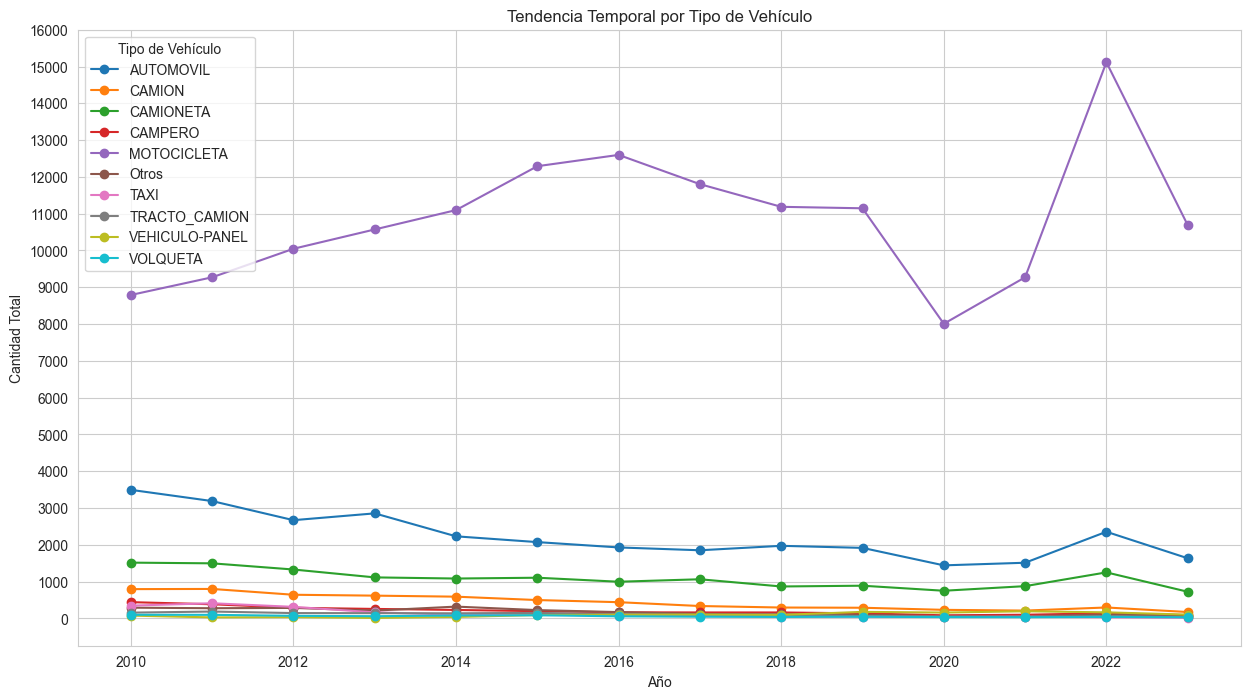

In [79]:
# Crear el gráfico de línea
plt.figure(figsize=(14, 10))
tendencia_temporal_tipo_vehiculo.plot.line(marker='o')

plt.title('Tendencia Temporal por Tipo de Vehículo')
plt.xlabel('Año')
plt.ylabel('Cantidad Total')

# Establecer la escala del eje Y en incrementos de 1000
yticks = range(0, int(tendencia_temporal_tipo_vehiculo.values.max()) + 1000, 1000)
plt.yticks(yticks)

# Mostrar la leyenda
plt.legend(title='Tipo de Vehículo', loc='upper left')

plt.grid(True)
plt.show()

In [75]:
df['DIA_SEMANA'] = df['FECHA_RECUPERACION'].dt.day_name()
recuperacion_por_dia_semana = df.groupby('DIA_SEMANA')['CANTIDAD'].sum()
recuperacion_por_dia_semana

DIA_SEMANA
Friday       35111
Monday       30386
Saturday     24033
Sunday       20747
Thursday     36346
Tuesday      33803
Wednesday    34797
Name: CANTIDAD, dtype: int64